# Imports

In [ ]:
import pandas as pd

# Options

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

# Code

In [ ]:
dataset_source = 'https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Final%20Project/data/data.csv'
df = pd.read_csv(dataset_source)
df.head(3)
df.shape

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change,Readmitted
0,2278392,50941692,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,50.0,NaN,NaN,1,Unknown,No,No,No,No,No,0
1,149190,24691500,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,0,18,0,0,0,55.0,49.0,51.0,9,Unknown,Yes,Yes,Yes,No,No,0
2,64410,55584504,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,5,13,2,0,1,186.0,49.0,196.0,6,Unknown,Yes,No,No,Yes,No,0


(81176, 27)

In [ ]:
df["Readmitted"].value_counts()

Readmitted
0    72232
1     8944
Name: count, dtype: int64

In [ ]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Final%20Project/data/data.csv'
data = pd.read_csv(file_path)


In [ ]:
!pip install catboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81176 entries, 0 to 81175
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      81176 non-null  object
 1   gender                    81176 non-null  object
 2   age                       81176 non-null  object
 3   discharge_disposition_id  81176 non-null  int64 
 4   admission_source_id       81176 non-null  int64 
 5   time_in_hospital          81176 non-null  int64 
 6   num_lab_procedures        81176 non-null  int64 
 7   num_procedures            81176 non-null  int64 
 8   num_medications           81176 non-null  int64 
 9   number_outpatient         81176 non-null  int64 
 10  number_emergency          81176 non-null  int64 
 11  number_inpatient          81176 non-null  int64 
 12  diag_1                    81176 non-null  object
 13  diag_2                    81176 non-null  object
 14  diag_3  

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Values Heatmap')

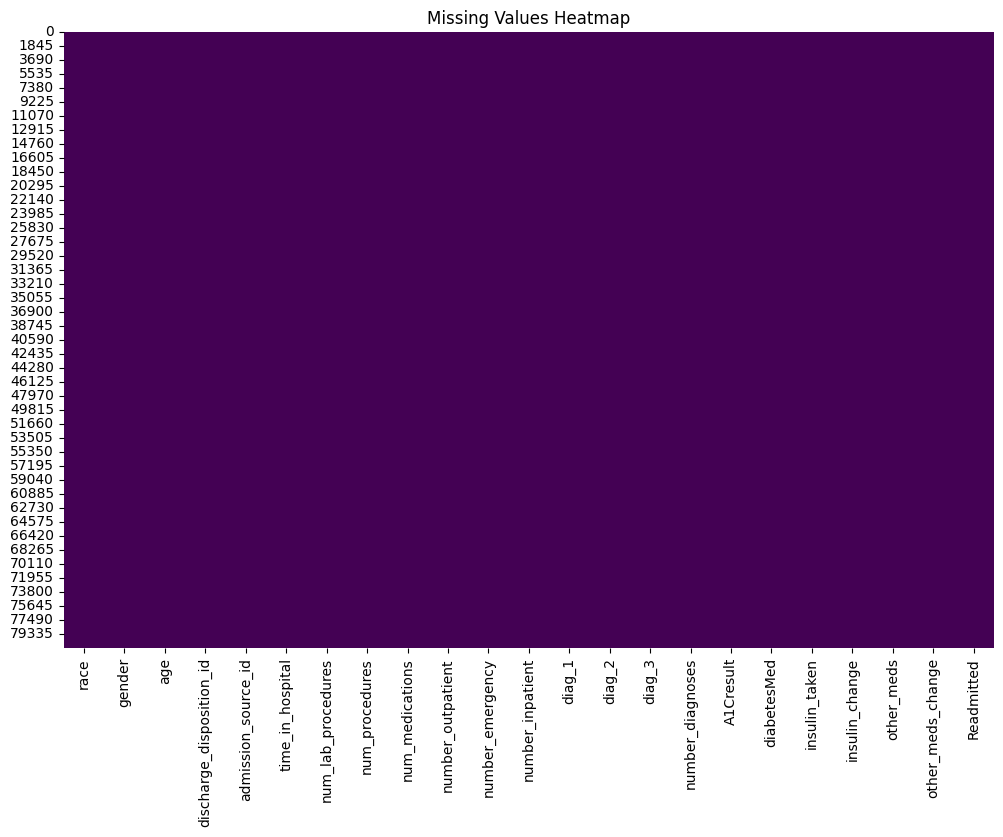

In [ ]:


# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Missing Values After Handling:
race                        0
gender                      0
age                         0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
diabetesMed                 0
insulin_taken               0
insulin_change              0
other_meds                  0
other_meds_change           0
Readmitted                  0
dtype: int64


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Values Heatmap After Handling')

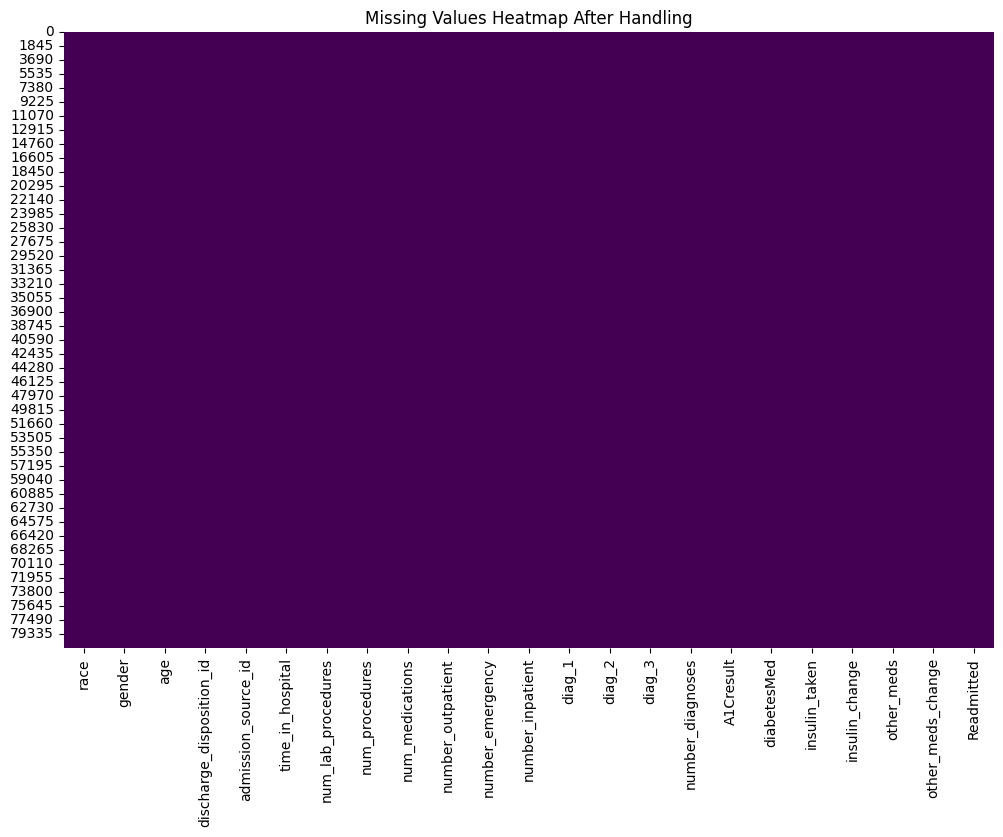

In [ ]:
# Handle missing values in diagnosis columns
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']  # assuming these are the diagnosis columns
df[diagnosis_columns] = df[diagnosis_columns].fillna('unknown')

# Verify that missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)

# Visualize missing values after handling
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Handling')
plt.show()

In [ ]:
# Drop columns that should not be used for prediction
df = df.drop(columns=['encounter_id', 'patient_nbr', 'admission_type_id', 'medical_specialty'])

KeyError: "['encounter_id', 'patient_nbr', 'admission_type_id', 'medical_specialty'] not found in axis"

In [ ]:
df

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change,Readmitted
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,0,0,50.0,unknown,unknown,1,Unknown,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,0,0,55.0,49.0,51.0,9,Unknown,Yes,Yes,Yes,No,No,0
2,AfricanAmerican,Female,[20-30),1,7,2,11,5,13,2,0,1,186.0,49.0,196.0,6,Unknown,Yes,No,No,Yes,No,0
3,Caucasian,Male,[30-40),1,7,2,44,1,16,0,0,0,228.0,50.0,99.0,7,Unknown,Yes,Yes,Yes,No,No,0
4,Caucasian,Male,[40-50),1,7,1,51,0,8,0,0,0,42.0,17.0,49.0,5,Unknown,Yes,Yes,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81171,AfricanAmerican,Female,[60-70),1,7,6,45,1,25,3,1,2,83.0,113.0,101.0,9,Unknown,Yes,Yes,Yes,Yes,No,0
81172,AfricanAmerican,Male,[70-80),3,7,3,51,0,16,0,0,0,50.0,660.0,117.0,9,>8,Yes,Yes,Yes,Yes,No,0
81173,AfricanAmerican,Female,[80-90),4,5,5,33,3,18,0,0,1,145.0,55.0,250.0,9,Unknown,Yes,Yes,No,No,No,0
81174,Caucasian,Female,[80-90),3,7,10,45,2,21,0,0,1,237.0,59.0,238.0,9,Unknown,Yes,Yes,Yes,Yes,No,0


# EDA

In [ ]:
# Filter the DataFrame for Readmitted = 1 and Readmitted = 0
filtered_df_readmitted_1 = df[df['Readmitted'] == 1]
filtered_df_readmitted_0 = df[df['Readmitted'] == 0]

# Select numerical columns for plotting
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting histograms for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(filtered_df_readmitted_1[column], bins=20, kde=True, color='blue', alpha=0.5, label='Readmitted=1', stat='density')
    sns.histplot(filtered_df_readmitted_0[column], bins=20, kde=True, color='red', alpha=0.5, label='Readmitted=0', stat='density')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# CatBooat

In [ ]:
!pip install catboost
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

V1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Display the column names to verify the target column name
print("Column Names:")
print(df.columns)

# Handle missing values in diagnosis columns
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']  # Assuming these are the diagnosis columns
df[diagnosis_columns] = df[diagnosis_columns].fillna('unknown')


# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

# **DEFINE THE TARGET COLUMN**
target_column = 'Readmitted'

# Split the data into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the CatBoost model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    logging_level='Silent'
)

X_train = X_train.astype({'diag_1': 'str', 'diag_2': 'str', 'diag_3': 'str'})
X_test = X_test.astype({'diag_1': 'str', 'diag_2': 'str', 'diag_3': 'str'})
# Train the model
model.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_test, y_test),
    verbose=100
)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Column Names:
Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'diabetesMed', 'insulin_taken',
       'insulin_change', 'other_meds', 'other_meds_change', 'Readmitted'],
      dtype='object')


V2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Display the column names to verify the target column name
print("Column Names:")
print(df.columns)

# Handle missing values in diagnosis columns
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']  # Assuming these are the diagnosis columns
df[diagnosis_columns] = df[diagnosis_columns].fillna('unknown')


# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

# **DEFINE THE TARGET COLUMN**
target_column = 'Readmitted'

# Split the data into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Define the CatBoost model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    logging_level='Silent'
)

X_train = X_train.astype({'diag_1': 'str', 'diag_2': 'str', 'diag_3': 'str'})
X_test = X_test.astype({'diag_1': 'str', 'diag_2': 'str', 'diag_3': 'str'})
# Train the model
model.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_test, y_test),
    verbose=100
)

# Predict probabilities on the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Function to calculate F1 score for different thresholds
def evaluate_threshold(threshold):
    y_pred = (y_proba >= threshold).astype(int)
    return f1_score(y_test, y_pred) # Use f1_score instead of F1


# Find the optimal threshold
thresholds = [i * 0.01 for i in range(101)]
f1_scores = [evaluate_threshold(t) for t in thresholds]

optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f'Optimal Threshold: {optimal_threshold}')

# Predict with the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f'Accuracy with Optimal Threshold: {accuracy_optimal:.2f}')
print('Confusion Matrix with Optimal Threshold:')
print(confusion_matrix(y_test, y_pred_optimal))
print('Classification Report with Optimal Threshold:')
print(classification_report(y_test, y_pred_optimal))

Column Names:
Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'diabetesMed', 'insulin_taken',
       'insulin_change', 'other_meds', 'other_meds_change', 'Readmitted'],
      dtype='object')


Optimal Threshold: 0.13
Accuracy with Optimal Threshold: 0.74
Confusion Matrix with Optimal Threshold:
[[11086  3361]
 [  939   850]]
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     14447
           1       0.20      0.48      0.28      1789

    accuracy                           0.74     16236
   macro avg       0.56      0.62      0.56     16236
weighted avg       0.84      0.74      0.78     16236



In [ ]:
!pip install hyperopt
!pip install --upgrade numpy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.0 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.0 which is incompatible.
rmm-cu12 24.4.0 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6

V3 (SUBMISSION)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
import numpy as np

# Handle missing values in diagnosis columns
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']
df[diagnosis_columns] = df[diagnosis_columns].fillna('unknown')

# Define the target column
target_column = 'Readmitted'



# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

# Convert all categorical features to string type
df[categorical_features] = df[categorical_features].astype(str)

# Split the data into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the objective function for hyperopt
def objective(params):
    model = CatBoostClassifier(
        iterations=int(params['iterations']),
        depth=int(params['depth']),
        learning_rate=params['learning_rate'],
        l2_leaf_reg=params['l2_leaf_reg'],
        border_count=int(params['border_count']),
        eval_metric='F1',
        random_seed=42,
        logging_level='Silent'
    )

    model.fit(X_train, y_train, cat_features=categorical_features)

    # Predict probabilities on the validation set
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    return {'loss': -f1, 'status': STATUS_OK}

# Define the search space
space = {
    'iterations': hp.quniform('iterations', 100, 300, 50),
    'depth': hp.quniform('depth', 4, 7, 3),
    'learning_rate': hp.uniform('learning_rate', 0.1, 0.2),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 5, 1),
    'border_count': hp.quniform('border_count', 32, 100, 1)
}

# Initialize trials object
trials = Trials()

# Perform optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials, rstate=np.random.default_rng(42))

# Get the best parameters
best_params = {
    'iterations': int(best['iterations']),
    'depth': int(best['depth']),
    'learning_rate': best['learning_rate'],
    'l2_leaf_reg': best['l2_leaf_reg'],
    'border_count': int(best['border_count'])
}

# Train the best model with optimal parameters
best_model = CatBoostClassifier(
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    border_count=best_params['border_count'],
    eval_metric='F1',
    random_seed=42,
    logging_level='Silent'
)

best_model.fit(X_train, y_train, cat_features=categorical_features)

# Predict probabilities on the test set
y_proba = best_model.predict_proba(X_test)[:, 1]

# Function to calculate F1 score for different thresholds
def evaluate_threshold(threshold):
    y_pred = (y_proba >= threshold).astype(int)
    return f1_score(y_test, y_pred)

# Find the optimal threshold
thresholds = [i * 0.01 for i in range(101)]
f1_scores = [evaluate_threshold(t) for t in thresholds]

optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f'Optimal Threshold: {optimal_threshold}')

# Predict with the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f'Accuracy with Optimal Threshold: {accuracy_optimal:.2f}')
print('Confusion Matrix with Optimal Threshold:')
print(confusion_matrix(y_test, y_pred_optimal))
print('Classification Report with Optimal Threshold:')
print(classification_report(y_test, y_pred_optimal))


100%|██████████| 50/50 [17:37<00:00, 21.15s/trial, best loss: -0.04805125467164976]


Optimal Threshold: 0.12
Accuracy with Optimal Threshold: 0.70
Confusion Matrix with Optimal Threshold:
[[10476  3971]
 [  859   930]]
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     14447
           1       0.19      0.52      0.28      1789

    accuracy                           0.70     16236
   macro avg       0.56      0.62      0.55     16236
weighted avg       0.84      0.70      0.75     16236



CHECKING FOR OVERFIT

In [ ]:

# Predict probabilities on the test set
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Function to calculate F1 score for different thresholds
def evaluate_threshold(threshold):
    y_pred = (y_proba_train >= threshold).astype(int)
    return f1_score(y_train, y_pred)

# Find the optimal threshold
thresholds = [i * 0.01 for i in range(101)]
f1_scores = [evaluate_threshold(t) for t in thresholds]

optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f'Optimal Threshold: {optimal_threshold}')

# Predict with the optimal threshold
y_pred_optimal = (y_proba_train >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
accuracy_optimal = accuracy_score(y_train, y_pred_optimal)
print(f'Accuracy with Optimal Threshold: {accuracy_optimal:.2f}')
print('Confusion Matrix with Optimal Threshold:')
print(confusion_matrix(y_train, y_pred_optimal))
print('Classification Report with Optimal Threshold:')
print(classification_report(y_train, y_pred_optimal))

Optimal Threshold: 0.17
Accuracy with Optimal Threshold: 0.84
Confusion Matrix with Optimal Threshold:
[[51750  6035]
 [ 4468  2687]]
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     57785
           1       0.31      0.38      0.34      7155

    accuracy                           0.84     64940
   macro avg       0.61      0.64      0.62     64940
weighted avg       0.85      0.84      0.85     64940



In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0


Feature Importances:
                     Feature  Importance
3   discharge_disposition_id   25.638022
11          number_inpatient   12.391249
12                    diag_1    8.017155
6         num_lab_procedures    5.690269
13                    diag_2    5.642659
8            num_medications    5.458389
14                    diag_3    5.126585
2                        age    4.649865
5           time_in_hospital    4.632921
0                       race    3.087194
10          number_emergency    2.641833
1                     gender    2.422885
7             num_procedures    2.272830
15          number_diagnoses    2.262907
16                 A1Cresult    2.216120
4        admission_source_id    2.215663
9          number_outpatient    1.888396
17               diabetesMed    0.969010
18             insulin_taken    0.959277
19            insulin_change    0.808818
20                other_meds    0.753045
21         other_meds_change    0.254907


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 22 artists>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importance')

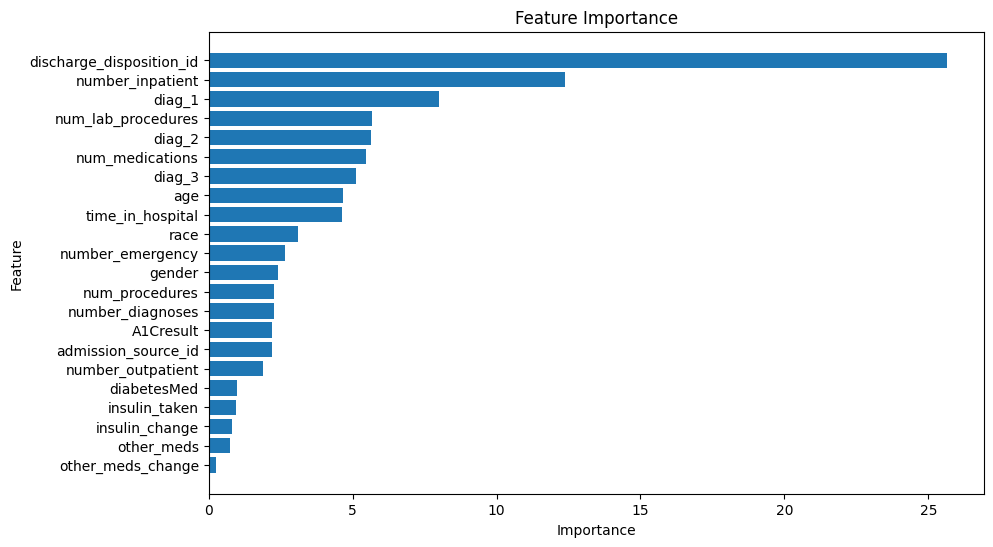

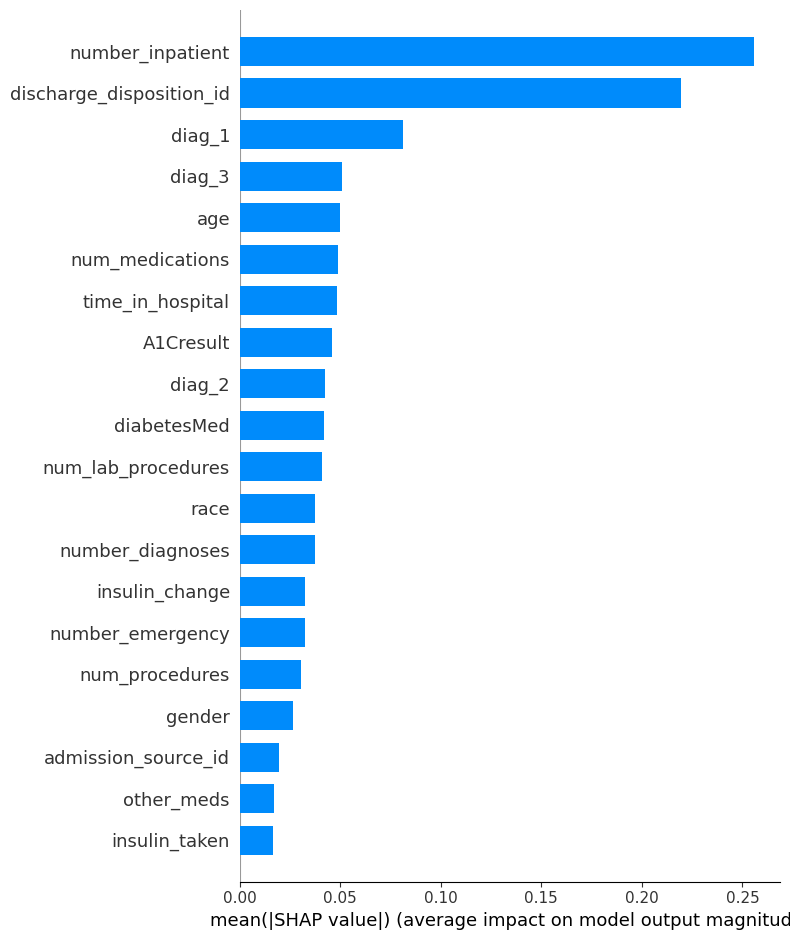

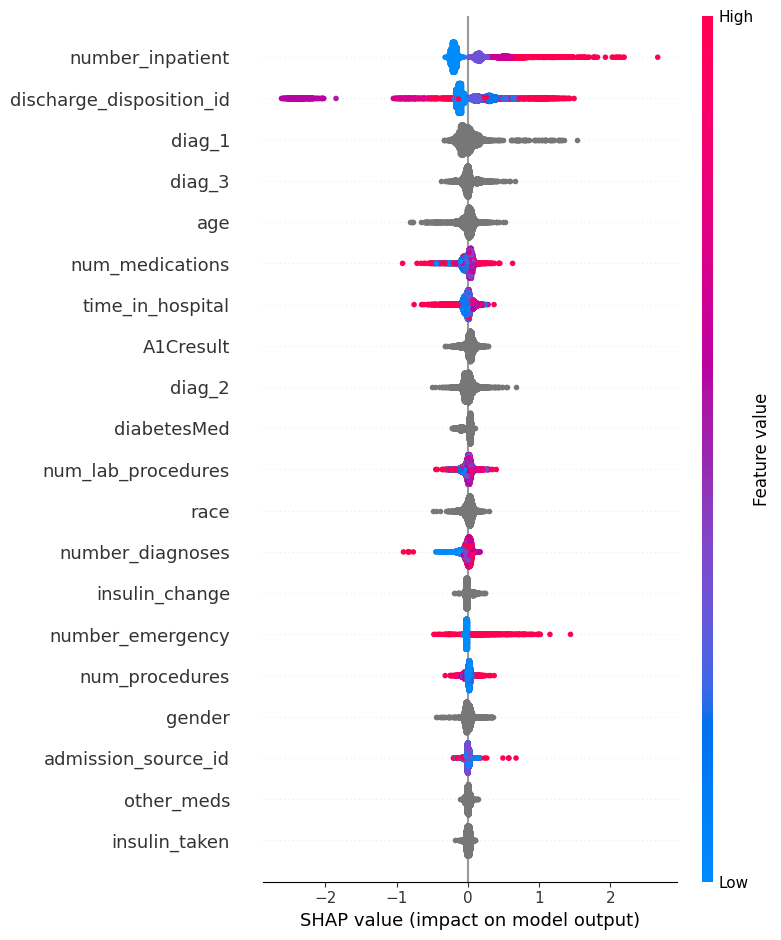

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already trained your best_model and split the data into X_train, X_test, y_train, y_test

# Get feature importance
feature_importances = best_model.get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot summary plot of SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot detailed SHAP values for each feature
shap.summary_plot(shap_values, X_test)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming you have already trained your best_model and split the data into X_train, X_test, y_train, y_test

# Add the predictions to the test set
X_test['predictions'] = best_model.predict(X_test)
X_test['true_labels'] = y_test

# Define sensitive features
sensitive_features = ['gender', 'race']

# Initialize a dictionary to hold the results
fairness_metrics = {}

# Calculate performance metrics for each sensitive feature and each subgroup
for feature in sensitive_features:
    metrics = {}
    subgroups = X_test[feature].unique()
    for subgroup in subgroups:
        subgroup_data = X_test[X_test[feature] == subgroup]
        y_true = subgroup_data['true_labels']
        y_pred = subgroup_data['predictions']

        metrics[subgroup] = {
            'accuracy': accuracy_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'recall': recall_score(y_true, y_pred),
            'f1_score': f1_score(y_true, y_pred),
            'positive_rate': y_pred.mean()
        }

    fairness_metrics[feature] = metrics

# Display the fairness metrics
print("Fairness Metrics by Sensitive Feature:")
for feature, metrics in fairness_metrics.items():
    print(f"\nFeature: {feature}")
    for subgroup, scores in metrics.items():
        print(f"  Subgroup: {subgroup}")
        for metric, value in scores.items():
            print(f"    {metric}: {value:.4f}")

# Calculate disparate impact
def calculate_disparate_impact(df, feature, positive_label=1):
    group_positive_rates = df.groupby(feature)['predictions'].mean()
    min_rate = group_positive_rates.min()
    max_rate = group_positive_rates.max()
    return min_rate / max_rate

# Calculate disparate impact for each sensitive feature
for feature in sensitive_features:
    di = calculate_disparate_impact(X_test, feature)
    print(f"\nDisparate Impact for {feature}: {di:.4f}")

# Calculate equalized odds
def calculate_equalized_odds(df, feature):
    odds = {}
    for subgroup in df[feature].unique():
        subgroup_data = df[df[feature] == subgroup]
        y_true = subgroup_data['true_labels']
        y_pred = subgroup_data['predictions']

        tpr = recall_score(y_true, y_pred)
        fpr = np.sum((y_true == 0) & (y_pred == 1)) / np.sum(y_true == 0)

        odds[subgroup] = {'tpr': tpr, 'fpr': fpr}

    return odds

# Calculate equalized odds for each sensitive feature
for feature in sensitive_features:
    odds = calculate_equalized_odds(X_test, feature)
    print(f"\nEqualized Odds for {feature}:")
    for subgroup, values in odds.items():
        print(f"  Subgroup: {subgroup}")
        print(f"    TPR: {values['tpr']:.4f}, FPR: {values['fpr']:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Fairness Metrics by Sensitive Feature:

Feature: gender
  Subgroup: Male
    accuracy: 0.8949
    precision: 0.4500
    recall: 0.0230
    f1_score: 0.0437
    positive_rate: 0.0053
  Subgroup: Female
    accuracy: 0.8861
    precision: 0.6136
    recall: 0.0269
    f1_score: 0.0515
    positive_rate: 0.0050
  Subgroup: Unknown/Invalid
    accuracy: 1.0000
    precision: 0.0000
    recall: 0.0000
    f1_score: 0.0000
    positive_rate: 0.0000

Feature: race
  Subgroup: Caucasian
    accuracy: 0.8888
    precision: 0.4545
    recall: 0.0223
    f1_score: 0.0425
    positive_rate: 0.0054
  Subgroup: AfricanAmerican
    accuracy: 0.8893
    precision: 0.8125
    recall: 0.0385
    f1_score: 0.0734
    positive_rate: 0.0054
  Subgroup: Asian
    accuracy: 0.9143
    precision: 1.0000
    recall: 0.1818
    f1_score: 0.3077
    positive_rate: 0.0190
  Subgroup: Unknown
    accuracy: 0.9139
    precision: 0.0000
    recall: 0.0000
    f1_score: 0.0000
    positive_rate: 0.0000
  Subgroup: Hi

<Axes: xlabel='subgroup', ylabel='accuracy'>

Text(0.5, 1.0, 'Accuracy by Subgroup')

Text(0.5, 0, 'Subgroup')

Text(0, 0.5, 'Accuracy')

<Axes: xlabel='subgroup', ylabel='precision'>

Text(0.5, 1.0, 'Precision by Subgroup')

Text(0.5, 0, 'Subgroup')

Text(0, 0.5, 'Precision')

<Axes: xlabel='subgroup', ylabel='recall'>

Text(0.5, 1.0, 'Recall by Subgroup')

Text(0.5, 0, 'Subgroup')

Text(0, 0.5, 'Recall')

<Axes: xlabel='subgroup', ylabel='f1_score'>

Text(0.5, 1.0, 'F1 Score by Subgroup')

Text(0.5, 0, 'Subgroup')

Text(0, 0.5, 'F1 Score')

<Axes: xlabel='subgroup', ylabel='positive_rate'>

Text(0.5, 1.0, 'Positive Rate by Subgroup')

Text(0.5, 0, 'Subgroup')

Text(0, 0.5, 'Positive Rate')

(0.0, 1.0, 0.0, 1.0)

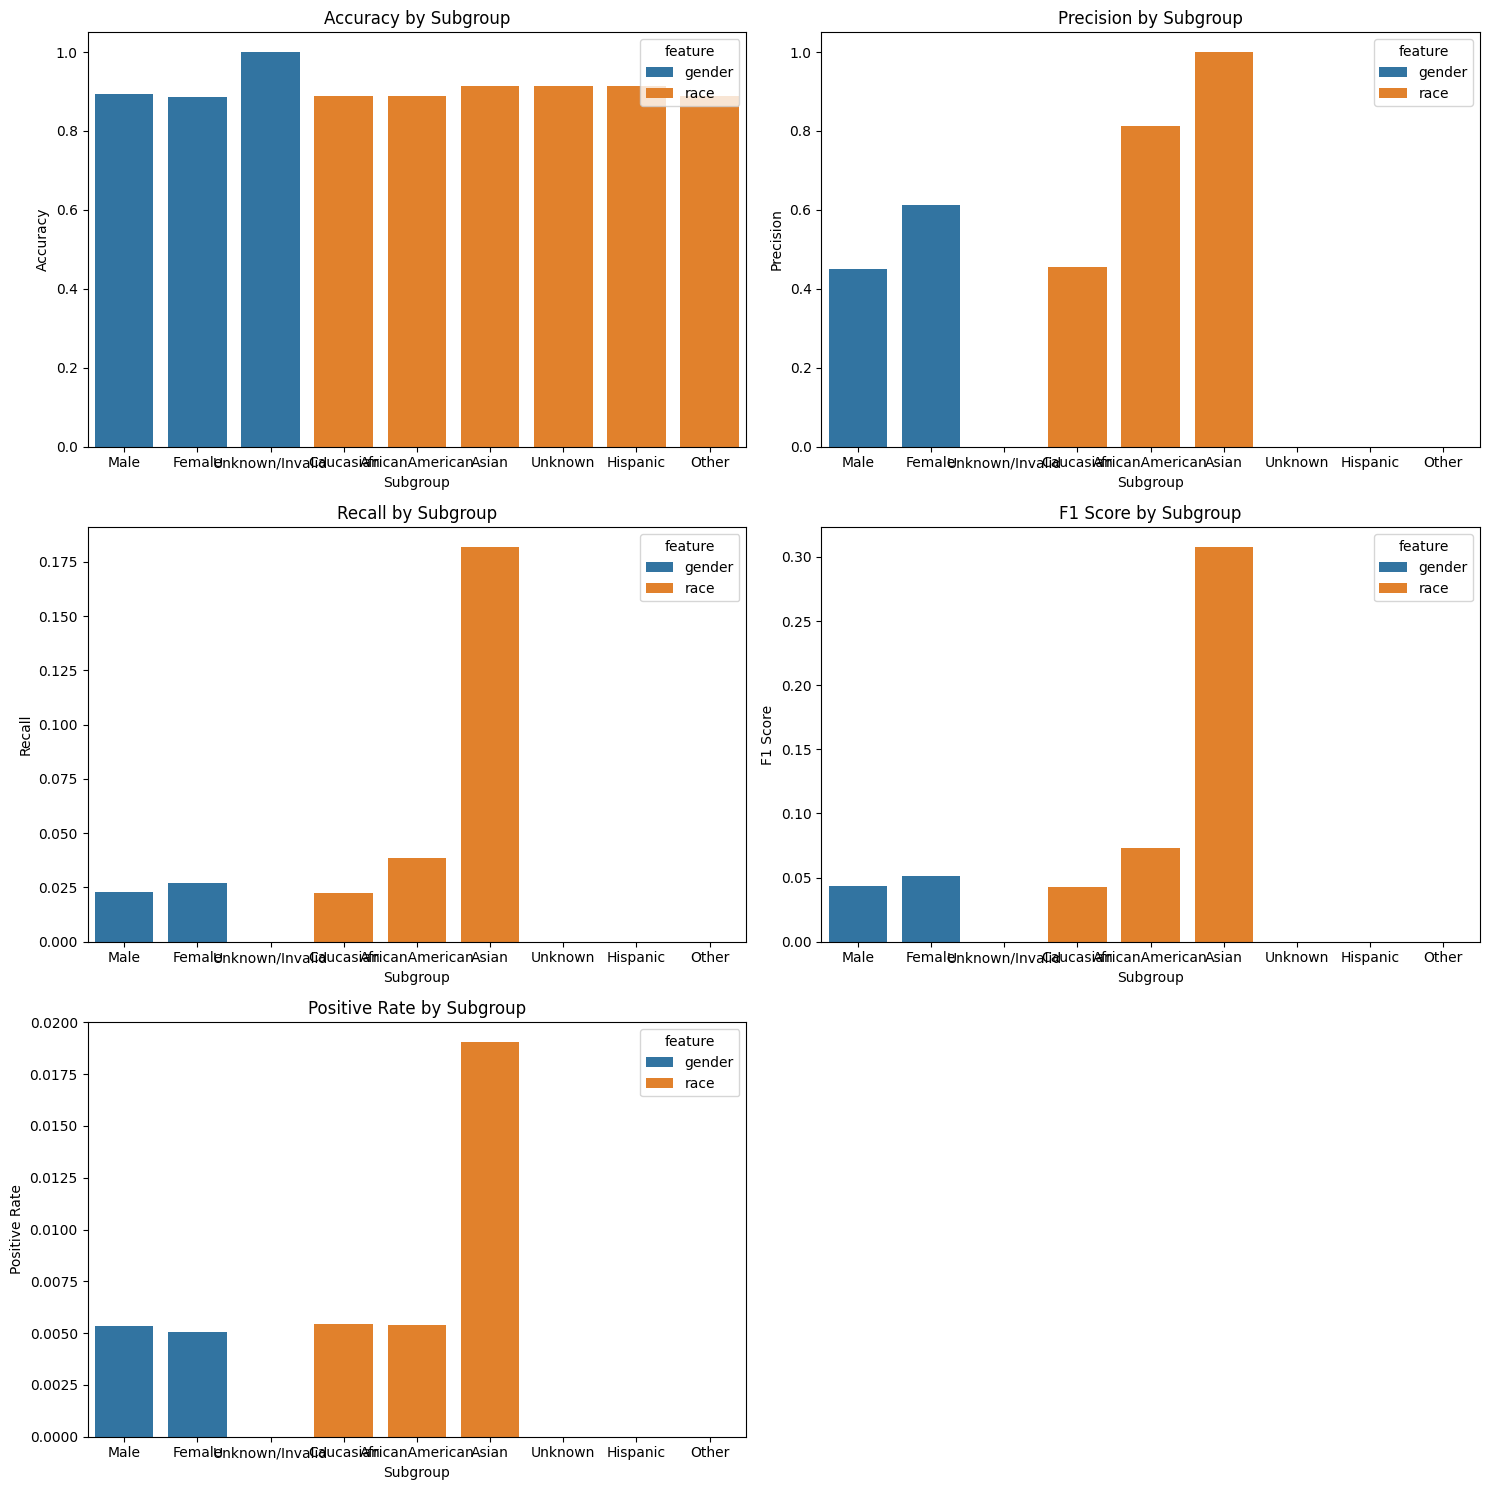

<Figure size 1200x600 with 0 Axes>

<ipython-input-94-7ebc99dbb8ee>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')


<Axes: xlabel='race'>

Text(0.5, 1.0, 'Value Counts of Race')

Text(0.5, 0, 'Race')

Text(0, 0.5, 'Count')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Caucasian'),
  Text(1, 0, 'AfricanAmerican'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Asian')])

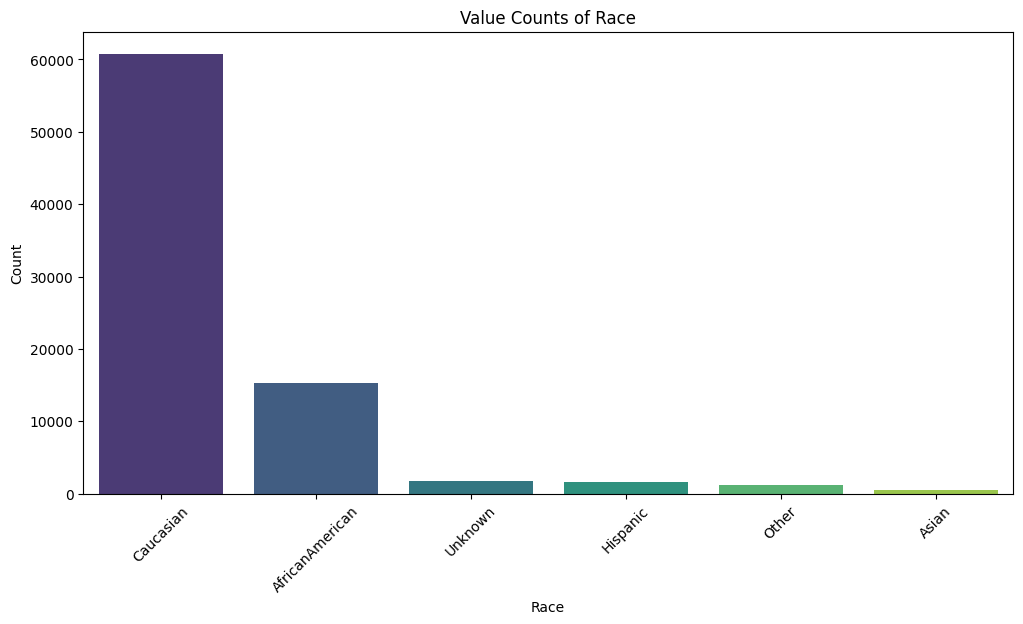

<Figure size 800x600 with 0 Axes>

<ipython-input-94-7ebc99dbb8ee>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


<Axes: xlabel='gender'>

Text(0.5, 1.0, 'Value Counts of Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

([0, 1, 2],
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown/Invalid')])

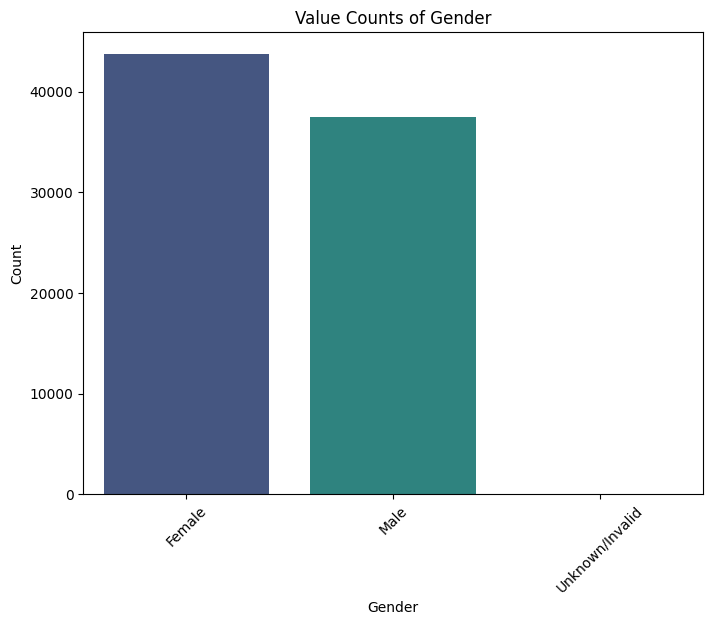

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have fairness_metrics dictionary from the previous steps

# Convert fairness_metrics dictionary to a DataFrame for easier plotting
metrics_df = []
for feature, metrics in fairness_metrics.items():
    for subgroup, scores in metrics.items():
        scores['subgroup'] = subgroup
        scores['feature'] = feature
        metrics_df.append(scores)

metrics_df = pd.DataFrame(metrics_df)

# Plot performance metrics for each subgroup
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(data=metrics_df, x='subgroup', y='accuracy', hue='feature', ax=axes[0, 0])
axes[0, 0].set_title('Accuracy by Subgroup')
axes[0, 0].set_xlabel('Subgroup')
axes[0, 0].set_ylabel('Accuracy')

sns.barplot(data=metrics_df, x='subgroup', y='precision', hue='feature', ax=axes[0, 1])
axes[0, 1].set_title('Precision by Subgroup')
axes[0, 1].set_xlabel('Subgroup')
axes[0, 1].set_ylabel('Precision')

sns.barplot(data=metrics_df, x='subgroup', y='recall', hue='feature', ax=axes[1, 0])
axes[1, 0].set_title('Recall by Subgroup')
axes[1, 0].set_xlabel('Subgroup')
axes[1, 0].set_ylabel('Recall')

sns.barplot(data=metrics_df, x='subgroup', y='f1_score', hue='feature', ax=axes[1, 1])
axes[1, 1].set_title('F1 Score by Subgroup')
axes[1, 1].set_xlabel('Subgroup')
axes[1, 1].set_ylabel('F1 Score')

sns.barplot(data=metrics_df, x='subgroup', y='positive_rate', hue='feature', ax=axes[2, 0])
axes[2, 0].set_title('Positive Rate by Subgroup')
axes[2, 0].set_xlabel('Subgroup')
axes[2, 0].set_ylabel('Positive Rate')

# Hide the last subplot (axes[2, 1]) since we don't need it
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Calculate value counts for race and gender
race_counts = df['race'].value_counts()
gender_counts = df['gender'].value_counts()

# Plot value counts for race
plt.figure(figsize=(12, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Value Counts of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot value counts for gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Value Counts of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

hyperparameters of model

In [ ]:

CatBoostClassifier.get_params(best_model)

{'iterations': 250,
 'learning_rate': 0.18135445512829274,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'border_count': 82,
 'random_seed': 42,
 'logging_level': 'Silent',
 'eval_metric': 'F1'}

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

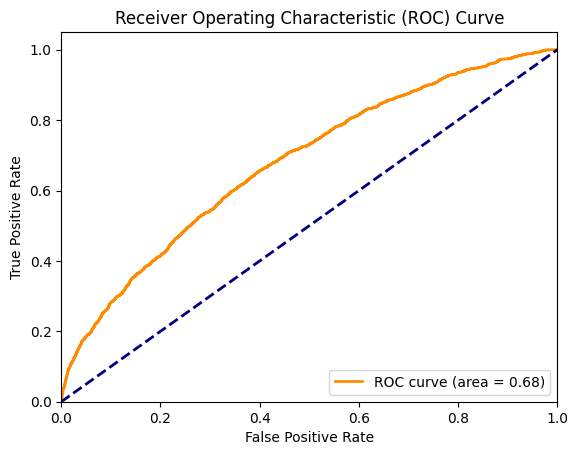

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your best_model and split the data into X_train, X_test, y_train, y_test

# Get the predicted probabilities for the positive class
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_proba_test)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


BELLOW IS SUBMISSION


In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Final%20Project/data/test_no_labels.csv')
test_df.head(3)
test_df.shape

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change
0,63768,85134888,Caucasian,Male,[70-80),1,1,7,5,Unknown,73,0,12,0,0,0,108.0,127.0,49.0,8,Unknown,Yes,No,No,Yes,No
1,36900,88157835,AfricanAmerican,Male,[60-70),2,1,4,7,Unknown,62,0,11,0,0,0,17.0,63.0,42.0,7,Unknown,Yes,Yes,No,Yes,Yes
2,62256,23782419,AfricanAmerican,Female,[60-70),3,1,2,1,Unknown,49,5,2,0,0,0,130.0,238.0,173.0,8,Unknown,Yes,Yes,No,No,No


(20590, 26)

In [ ]:
# Handle missing values in diagnosis columns
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']
test_df[diagnosis_columns] = test_df[diagnosis_columns].fillna('unknown')

# Identify categorical and numerical columns
categorical_features = test_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = test_df.select_dtypes(exclude=['object']).columns.tolist()

# Convert all categorical features to string type
test_df[categorical_features] = test_df[categorical_features].astype(str)


In [ ]:
test_df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change
0,63768,85134888,Caucasian,Male,[70-80),1,1,7,5,Unknown,73,0,12,0,0,0,108.0,127.0,49.0,8,Unknown,Yes,No,No,Yes,No
1,36900,88157835,AfricanAmerican,Male,[60-70),2,1,4,7,Unknown,62,0,11,0,0,0,17.0,63.0,42.0,7,Unknown,Yes,Yes,No,Yes,Yes
2,62256,23782419,AfricanAmerican,Female,[60-70),3,1,2,1,Unknown,49,5,2,0,0,0,130.0,238.0,173.0,8,Unknown,Yes,Yes,No,No,No
3,84222,498411,Caucasian,Female,[50-60),1,1,7,3,Cardiology,29,0,11,0,0,0,197.0,24.0,49.0,3,Unknown,Yes,No,No,Yes,No
4,182796,115006590,AfricanAmerican,Female,[70-80),2,1,4,2,Unknown,47,0,12,0,0,0,100.0,99.0,156.0,8,Unknown,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20585,443797076,3724263,Caucasian,Male,[50-60),2,1,1,3,Unknown,57,0,7,0,1,0,197.0,49.0,99.0,3,>8,Yes,No,No,Yes,No
20586,443835512,91419696,Other,Female,[40-50),3,1,1,3,Unknown,13,1,5,0,0,0,95.0,84.0,95.0,8,Unknown,Yes,Yes,No,Yes,No
20587,443841992,24540165,Other,Male,[40-50),1,1,7,13,Unknown,51,2,13,0,0,0,50.0,201.0,212.0,9,Unknown,Yes,Yes,Yes,Yes,No
20588,443842778,42671313,Caucasian,Male,[80-90),1,1,7,1,Unknown,1,0,15,3,0,0,112.0,84.0,49.0,7,Unknown,Yes,Yes,Yes,No,No


In [ ]:
test_df_encounter = test_df['encounter_id']

In [ ]:
# Drop columns that should not be used for prediction
test_df = test_df.drop(columns=['encounter_id', 'patient_nbr', 'admission_type_id', 'medical_specialty'])

In [ ]:
test_df

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,diabetesMed,insulin_taken,insulin_change,other_meds,other_meds_change
0,Caucasian,Male,[70-80),1,7,5,73,0,12,0,0,0,108.0,127.0,49.0,8,Unknown,Yes,No,No,Yes,No
1,AfricanAmerican,Male,[60-70),1,4,7,62,0,11,0,0,0,17.0,63.0,42.0,7,Unknown,Yes,Yes,No,Yes,Yes
2,AfricanAmerican,Female,[60-70),1,2,1,49,5,2,0,0,0,130.0,238.0,173.0,8,Unknown,Yes,Yes,No,No,No
3,Caucasian,Female,[50-60),1,7,3,29,0,11,0,0,0,197.0,24.0,49.0,3,Unknown,Yes,No,No,Yes,No
4,AfricanAmerican,Female,[70-80),1,4,2,47,0,12,0,0,0,100.0,99.0,156.0,8,Unknown,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20585,Caucasian,Male,[50-60),1,1,3,57,0,7,0,1,0,197.0,49.0,99.0,3,>8,Yes,No,No,Yes,No
20586,Other,Female,[40-50),1,1,3,13,1,5,0,0,0,95.0,84.0,95.0,8,Unknown,Yes,Yes,No,Yes,No
20587,Other,Male,[40-50),1,7,13,51,2,13,0,0,0,50.0,201.0,212.0,9,Unknown,Yes,Yes,Yes,Yes,No
20588,Caucasian,Male,[80-90),1,7,1,1,0,15,3,0,0,112.0,84.0,49.0,7,Unknown,Yes,Yes,Yes,No,No


In [ ]:
# To obtain model probabilities #
probas = best_model.predict_proba(test_df)[:,1] # i'm assuming "model" is your trained model

# To obtain model prediction #
threshold = 0.12 # or another one if you decided to use a different one after your analysis
predictions = (probas > threshold).astype(int)

In [ ]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
len(predictions)

20590

In [ ]:
test_df.shape

(20590, 22)

In [ ]:
# prepare your submission

submission_data = {'id': test_df_encounter, # the encounter_id column of the test data
                   'prediction': predictions,
                   'probas': probas
                   }

submission_data = pd.DataFrame(submission_data)
submission_data.head(3)
submission_data.shape

,id,prediction,probas
0,63768,0,0.071592
1,36900,1,0.143682
2,62256,0,0.055804


(20590, 3)

In [ ]:
prediction_counts = submission_data['prediction'].value_counts()
print(prediction_counts)

prediction
0    14256
1     6334
Name: count, dtype: int64


In [ ]:
6334/(6334+14256)

0.3076250607090821

In [ ]:
assert submission_data.shape[1] == 3, "The number of columns in your submission should be 3."
assert all([col in ['id','prediction','probas'] for col in submission_data.columns]), "Do you have the 3 required columns? We expect 'id', 'target' and 'probas'."

assert submission_data.shape[0] == test_df.shape[0], "The number of rows in your submission should be the same as the number of rows in the test data."
assert submission_data['id'].equals(test_df_encounter), "The 'id' column of your submission should be the 'encounter_id' column of the test data."

assert all((submission_data['probas'] <= 1.0) & (submission_data['probas'] >= 0.0)), "The probabilities should be.... probabilities. We found values below 0 or greater than 1 in your submission"
# check if target is either True or False, or 0 and 1
assert all([x in [True, False] for x in submission_data['prediction']]) or all([x in [0, 1] for x in submission_data['target']]), "The target column should be either True/False or 0/1"

In [ ]:
submission_data

,id,prediction,probas
0,63768,0,0.071592
1,36900,1,0.143682
2,62256,0,0.055804
3,84222,0,0.034628
4,182796,0,0.080868
...,...,...,...
20585,443797076,0,0.043886
20586,443835512,0,0.049502
20587,443841992,0,0.056794
20588,443842778,0,0.105354


In [ ]:
submission_data.to_csv('/content/submission.csv', index=False)